In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [2]:
a = pd.read_csv('accepted.csv')
a.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [3]:
a.shape

(2260701, 151)

In [4]:
#1. Remove all obserations with No Funded Amount First, How many:
print(len(a[a.funded_amnt.isnull()]))

33


In [5]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [6]:
#No more NaN funded amounts: 
a[a.funded_amnt.isna()].shape

(0, 151)

In [7]:
#2. How many value types for "loan_status"?
print(a.loan_status.value_counts(dropna=False).sum()) #Total matches

a.loan_status.value_counts(dropna=False)

2260668


Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [8]:
#Create new column and map Charged Off = 0, Fully Paid = 1
a['loan_status_bin'] = a['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [9]:
#Quick Check:
a[['loan_status', 'loan_status_bin']].sample(10)

,loan_status,loan_status_bin
1617740,Fully Paid,1.0
27939,Fully Paid,1.0
1016963,Fully Paid,1.0
1077181,Fully Paid,1.0
2004547,Charged Off,0.0
293175,Fully Paid,1.0
936298,Current,NaN
894997,Fully Paid,1.0
2229198,Current,NaN
2062435,Fully Paid,1.0


In [10]:
#Drop all loans which do not classify as "Fully Paid" or "Charged Off":
drop2 = a[a.loan_status_bin.isnull()].index
a.drop(drop2, axis=0, inplace=True)
a.shape

(1345310, 152)

In [11]:
a.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_bin
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0

In [12]:
#3. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(110144, 152)

In [13]:
#4. Check breakdown by grade type and and Keep ALL:
a.grade.value_counts()

E    55735
F    31483
D    13824
G     9102
Name: grade, dtype: int64

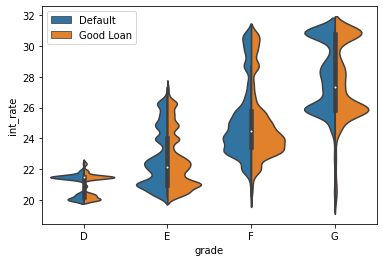

In [14]:
g = sns.violinplot(data=a, y='int_rate', x='grade', split=True, hue='loan_status_bin',
               order=['D', 'E', 'F', 'G'])

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [15]:
a[['grade', 'loan_status_bin']].groupby(['grade']).describe()

loan_status_bin                                             
                count      mean       std  min  25%  50%  75%  max
grade                                                             
D             13824.0  0.669560  0.470389  0.0  0.0  1.0  1.0  1.0
E             55735.0  0.617673  0.485960  0.0  0.0  1.0  1.0  1.0
F             31483.0  0.544643  0.498011  0.0  0.0  1.0  1.0  1.0
G              9102.0  0.500000  0.500027  0.0  0.0  0.5  1.0  1.0

In [16]:
a[['loan_status_bin']].describe()

,loan_status_bin
count,110144.000000
mean,0.593587
std,0.491166
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [18]:
#5. Keep verification....see what happens: 

#Earlier we dropped all observations where income is not verified: 

a['verification_status'].value_counts()

Verified           55452
Source Verified    40770
Not Verified       13922
Name: verification_status, dtype: int64

In [19]:
#a = a[a['verification_status']!='Not Verified'].reset_index(drop=True)
a.shape

(110144, 152)

In [20]:
#6. Drop member_id (all NaN), funded_amnt, funded_amnt_inv. Keep loan_amnt (we know that before investment): 
a.drop(['member_id', 'funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)
a.shape

(110144, 149)

In [21]:
#7. Remove all columns related to "hardship" status. We won't know this at get go. 

a.drop(['hardship_flag', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
        'hardship_loan_status', 'hardship_dpd', 'hardship_end_date', 'hardship_start_date',
        'hardship_amount', 'hardship_status', 'hardship_reason', 'hardship_type', 
        'hardship_length'], axis=1, inplace=True)
a.shape

(110144, 137)

In [22]:
#8. Remove 'Policy Code' Column. All Policy Codes here are '1'. 
a.policy_code.value_counts()

1.0    110144
Name: policy_code, dtype: int64

In [23]:
a.drop(['policy_code'], axis=1, inplace=True)
a.shape

(110144, 136)

In [24]:
#9. Remove all observations with "Joint Applications". 
a.application_type.value_counts()

Individual    106009
Joint App       4135
Name: application_type, dtype: int64

In [25]:
a = a[a.application_type == 'Individual']
a.shape

(106009, 136)

In [26]:
#10. Remove all info regarding second applicant or "Joint Applications".

In [27]:
a.drop(['sec_app_mths_since_last_major_derog', 'sec_app_collections_12_mths_ex_med',
        'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il',
        'sec_app_revol_util', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc',
        'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_low',
        'dti_joint', 'sec_app_fico_range_high', 'verification_status_joint', 'revol_bal_joint', 
        'annual_inc_joint'], axis=1, inplace=True)

a.shape

(106009, 120)

In [28]:
#11. Remove 'next_pymnt_d' because all loans are "Paid Off" or "Defaulted", so they are all "NaN"
a.next_pymnt_d.isna().sum()

106009

In [29]:
a.drop(['next_pymnt_d'], axis=1, inplace=True)
a.shape

(106009, 119)

In [30]:
#11. Drop 'url'. It will not provide any info. 
a.drop(['url'], axis=1, inplace=True)
a.shape

(106009, 118)

In [31]:
#12. Drop 'zip_code'. It's not even complete. Can always use addr_state if location is a factor. 
a.drop(['zip_code'], axis=1, inplace=True)
a.shape

(106009, 117)

In [32]:
#13. "out_prncp" and "out_prncp_inv" are 0 because there is no more "outstanding" amounts. Drop them. 
print(a.out_prncp.value_counts())
print(a.out_prncp_inv.value_counts())

0.0    106009
Name: out_prncp, dtype: int64
0.0    106009
Name: out_prncp_inv, dtype: int64


In [33]:
a.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)
a.shape

(106009, 115)

In [34]:
#14. Remove 'id' (irrevelvant) but keep 'issue_d' for feature engineering.
a.drop(['id'], axis=1, inplace=True)
a.shape

(106009, 114)

In [35]:
#15. Drop 'pymnt_plan'. They are all 'n'. 
a.pymnt_plan.value_counts()

n    106009
Name: pymnt_plan, dtype: int64

In [36]:
a.drop(['pymnt_plan'], axis=1, inplace=True)
a.shape

(106009, 113)

In [37]:
#16. Drop 'last_fico_range_high' and 'last_fico_range_low'. We only rely on initial fico scores. 
a.drop(['last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)
a.shape

(106009, 111)

In [38]:
#17. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(106009, 111)

In [39]:
#Partial Set of Features, Work in Progress......

In [40]:
#18. Let's rearrange order of columns to enhance our view: 
sub = a[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'addr_state', 'loan_status', 
   'loan_status_bin', 
   'application_type',
   'verification_status','emp_title',
   'total_pymnt', 'total_pymnt_inv',
   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
   'recoveries', 'collection_recovery_fee',
   'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
   'desc']]

sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,addr_state,loan_status,loan_status_bin,application_type,verification_status,emp_title,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,desc
0,Dec-2015,10400.0,104433.0,25.37,695.0,699.0,60 months,22.45,289.91,w,F,F1,3 years,MORTGAGE,Jun-1998,12.0,35.0,21929.0,64.5,3.0,1.0,12.0,0.0,0.0,0.0,331730.0,0.0,NaN,major_purchase,Major purchase,PA,Fully Paid,1.0,Individual,Source Verified,Contract Specialist,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,NaN
1,Dec-2015,24250.0,75000.0,20.84,660.0,664.0,60 months,24.24,701.01,w,F,F3,4 years,MORTGAGE,Apr-2007,18.0,21.0,24799.0,65.3,0.0,0.0,NaN,0.0,0.0,0.0,320098.0,0.0,NaN,debt_consolidation,NaN,NY,Charged Off,0.0,Individual,Not Verified,hvac technician,4124.42,4124.42,1332.69,2791.73,0.0,0.0,0.0,Jul-2016,701.01,Mar-2018,NaN


In [41]:
sub.shape

(106009, 47)

In [42]:
sub.isna().mean().sort_values()

issue_d                       0.000000
acc_now_delinq                0.000000
pub_rec                       0.000000
purpose                       0.000000
addr_state                    0.000000
loan_status                   0.000000
loan_status_bin               0.000000
application_type              0.000000
delinq_2yrs                   0.000000
verification_status           0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
total_pymnt                   0.000000
inq_last_6mths                0.000000
collections_12_mths_ex_med    0.000000
revol_bal                     0.000000
loan_amnt                     0.000000
annual_inc                    0.000000
dti                           0.000000
fico_range_low                0.000000
fico_range_high          

In [43]:
#Carve out features from 'sub' which you think are most important:

imp_sub = sub[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths', 'verification_status',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'loan_status', 
   'loan_status_bin']] 

In [44]:
imp_sub.shape

(106009, 33)

In [45]:
imp_sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,loan_status,loan_status_bin
0,Dec-2015,10400.0,104433.0,25.37,695.0,699.0,60 months,22.45,289.91,w,F,F1,3 years,MORTGAGE,Jun-1998,12.0,35.0,21929.0,64.5,3.0,Source Verified,1.0,12.0,0.0,0.0,0.0,331730.0,0.0,NaN,major_purchase,Major purchase,Fully Paid,1.0
1,Dec-2015,24250.0,75000.0,20.84,660.0,664.0,60 months,24.24,701.01,w,F,F3,4 years,MORTGAGE,Apr-2007,18.0,21.0,24799.0,65.3,0.0,Not Verified,0.0,NaN,0.0,0.0,0.0,320098.0,0.0,NaN,debt_consolidation,NaN,Charged Off,0.0


In [46]:
imp_sub.isna().sum().sort_values()

issue_d                           0
purpose                           0
pub_rec                           0
collections_12_mths_ex_med        0
acc_now_delinq                    0
delinq_2yrs                       0
verification_status               0
inq_last_6mths                    0
revol_bal                         0
loan_status                       0
open_acc                          0
earliest_cr_line                  0
home_ownership                    0
total_acc                         0
sub_grade                         0
loan_amnt                         0
annual_inc                        0
dti                               0
fico_range_high                   0
term                              0
fico_range_low                    0
installment                       0
initial_list_status               0
grade                             0
int_rate                          0
loan_status_bin                   0
revol_util                      111
title                       

In [47]:
#Let's add emp_length to the mix. Impute NaN with "None" string for time being: 

In [48]:
imp_sub['emp_length'].isna().sum()

5782

In [49]:
imp_sub['emp_length'].replace(np.nan, "None", inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
imp_sub['emp_length'].isna().sum()

0

In [51]:
imp_sub.isna().sum().sort_values()

issue_d                           0
purpose                           0
pub_rec                           0
collections_12_mths_ex_med        0
acc_now_delinq                    0
delinq_2yrs                       0
verification_status               0
inq_last_6mths                    0
revol_bal                         0
loan_status                       0
open_acc                          0
earliest_cr_line                  0
home_ownership                    0
total_acc                         0
sub_grade                         0
loan_amnt                         0
annual_inc                        0
dti                               0
emp_length                        0
fico_range_high                   0
fico_range_low                    0
int_rate                          0
installment                       0
initial_list_status               0
grade                             0
term                              0
loan_status_bin                   0
revol_util                  

In [52]:
#Let's take a closer look at "mths_since_last_delinq":
imp_sub.mths_since_last_delinq.value_counts(dropna=False)

NaN      49885
12.0      1162
14.0      1144
13.0      1104
6.0       1101
15.0      1091
8.0       1078
9.0       1076
7.0       1061
10.0      1058
11.0      1048
5.0       1041
19.0      1012
16.0       974
17.0       964
18.0       960
21.0       956
24.0       954
20.0       947
22.0       941
25.0       922
26.0       912
23.0       904
28.0       903
29.0       896
27.0       886
30.0       875
33.0       849
31.0       818
4.0        804
34.0       803
35.0       790
32.0       787
38.0       771
37.0       753
36.0       750
42.0       712
44.0       710
39.0       708
41.0       707
40.0       696
43.0       686
45.0       684
3.0        682
47.0       658
48.0       648
46.0       643
2.0        613
49.0       601
53.0       505
50.0       491
54.0       485
56.0       484
1.0        483
51.0       483
55.0       471
68.0       467
64.0       462
60.0       444
52.0       441
58.0       437
57.0       437
61.0       436
59.0       429
62.0       428
73.0       425
69.0      

In [ ]:
#There are too many observations with missing values, NaN. We should drop this column/feature. 

In [54]:
imp_sub.isna().sum().sort_values()

issue_d                           0
purpose                           0
pub_rec                           0
collections_12_mths_ex_med        0
acc_now_delinq                    0
delinq_2yrs                       0
verification_status               0
inq_last_6mths                    0
revol_bal                         0
loan_status                       0
open_acc                          0
earliest_cr_line                  0
home_ownership                    0
total_acc                         0
sub_grade                         0
loan_amnt                         0
annual_inc                        0
dti                               0
emp_length                        0
fico_range_high                   0
fico_range_low                    0
int_rate                          0
installment                       0
initial_list_status               0
grade                             0
term                              0
loan_status_bin                   0
revol_util                  

In [55]:
#For the time being, drop all other features with NAs....we don't know which ones are important.
#We also don't know what is the best way to "impute".
No_NA = imp_sub.dropna(axis=1)
No_NA

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin
0,Dec-2015,10400.0,104433.0,25.37,695.0,699.0,60 months,22.45,289.91,w,F,F1,3 years,MORTGAGE,Jun-1998,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0
1,Dec-2015,24250.0,75000.0,20.84,660.0,664.0,60 months,24.24,701.01,w,F,F3,4 years,MORTGAGE,Apr-2007,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0
2,Dec-2015,15850.0,45000.0,34.85,755.0,759.0,60 months,23.13,448.01,f,F,F2,10+ years,OWN,Jan-2007,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0
3,Dec-2015,23100.0,110000.0,20.43,660.0,664.0,60 months,20.50,618.46,w,E,E4,2 years,OWN,Aug-1986,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0
4,Dec-2015,35000.0,120000.0,35.69,700.0,704.0,60 months,20.50,937.06,w,E,E4,8 years,MORTGAGE,Oct-1994,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,Oct-2016,35000.0,72000.0,16.63,675.0,679.0,60 months,21.49,956.55,f,D,D5,< 1 year,RENT,Oct-2006,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,0.0,major_purchase,Charged Off,0.0
106005,Oct-2016,15650.0,58000.0,27.81,685.0,689.0,60 months,26.49,473.12,w,F,F2,10+ years,MORTGAGE,Jul-2002,13.0,29.0,8273.0,1.0,Verified,0.0,0.0,0.0,1.0,debt_consolidation,Fully Paid,1.0
106006,Oct-2016,27450.0,80000.0,15.17,705.0,709.0,36 months,21.49,1041.10,f,D,D5,6 years,MORTGAGE,Jun-2007,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0
106007,Oct-2016,20000.0,75000.0,25.23,670.0,674.0,60 months,21.49,546.60,f,D,D5,10+ years,MORTGAGE,Jul-1998,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0


In [56]:
#We now have 31 features (includes target as well)
No_NA.shape

(106009, 27)

In [57]:
#Cross check that dataframe in use has no more Null values:
No_NA.isna().sum().sum()

0

In [58]:
data = No_NA.copy()

In [59]:
#Data Types of Remaining Features: 
data.dtypes

issue_d                        object
loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
earliest_cr_line               object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
pub_rec                       float64
purpose                        object
loan_status                    object
loan_status_

In [60]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'issue_d': ['Dec-2015',
  'Nov-2015',
  'Oct-2015',
  'Sep-2015',
  'Aug-2015',
  'Jul-2015',
  'Jun-2015',
  'May-2015',
  'Apr-2015',
  'Mar-2015',
  'Feb-2015',
  'Jan-2015',
  'Mar-2018',
  'Feb-2018',
  'Jan-2018',
  'Sep-2017',
  'Aug-2017',
  'Jul-2017',
  'Jun-2016',
  'May-2016',
  'Apr-2016',
  'Sep-2018',
  'Aug-2018',
  'Jul-2018',
  'Jun-2017',
  'May-2017',
  'Apr-2017',
  'Mar-2016',
  'Feb-2016',
  'Jan-2016',
  'Dec-2014',
  'Nov-2014',
  'Oct-2014',
  'Sep-2014',
  'Aug-2014',
  'Jul-2014',
  'Jun-2014',
  'May-2014',
  'Apr-2014',
  'Mar-2014',
  'Feb-2014',
  'Jan-2014',
  'Dec-2018',
  'Nov-2018',
  'Oct-2018',
  'Jun-2018',
  'May-2018',
  'Apr-2018',
  'Dec-2011',
  'Nov-2011',
  'Oct-2011',
  'Sep-2011',
  'Aug-2011',
  'Jul-2011',
  'Jun-2011',
  'May-2011',
  'Apr-2011',
  'Mar-2011',
  'Feb-2011',
  'Jan-2011',
  'Dec-2010',
  'Nov-2010',
  'Oct-2010',
  'Sep-2010',
  'Aug-2010',
  'Jul-2010',
  'Jun-2010',
  'Apr-2010',
  'Mar-2010',
  'Feb-2010',
  'Jan-20

In [61]:
#A. Working with Date Columns First: 

In [62]:
date_columns = ['issue_d', 'earliest_cr_line']

In [63]:
data[date_columns]

,issue_d,earliest_cr_line
0,Dec-2015,Jun-1998
1,Dec-2015,Apr-2007
2,Dec-2015,Jan-2007
3,Dec-2015,Aug-1986
4,Dec-2015,Oct-1994
...,...,...
106004,Oct-2016,Oct-2006
106005,Oct-2016,Jul-2002
106006,Oct-2016,Jun-2007
106007,Oct-2016,Jul-1998


In [64]:
data.loc[0, 'earliest_cr_line'][0:3]

'Jun'

In [65]:
data.loc[0, 'earliest_cr_line'][-4:]

'1998'

In [66]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [67]:
data

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,Dec-2015,10400.0,104433.0,25.37,695.0,699.0,60 months,22.45,289.91,w,F,F1,3 years,MORTGAGE,Jun-1998,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,Dec,2015,Jun,1998
1,Dec-2015,24250.0,75000.0,20.84,660.0,664.0,60 months,24.24,701.01,w,F,F3,4 years,MORTGAGE,Apr-2007,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,Dec,2015,Apr,2007
2,Dec-2015,15850.0,45000.0,34.85,755.0,759.0,60 months,23.13,448.01,f,F,F2,10+ years,OWN,Jan-2007,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,Dec,2015,Jan,2007
3,Dec-2015,23100.0,110000.0,20.43,660.0,664.0,60 months,20.50,618.46,w,E,E4,2 years,OWN,Aug-1986,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,Dec,2015,Aug,1986
4,Dec-2015,35000.0,120000.0,35.69,700.0,704.0,60 months,20.50,937.06,w,E,E4,8 years,MORTGAGE,Oct-1994,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,Dec,2015,Oct,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,Oct-2016,35000.0,72000.0,16.63,675.0,679.0,60 months,21.49,956.55,f,D,D5,< 1 year,RENT,Oct-2006,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,0.0,major_purchase,Charged Off,0.0,Oct,2016,Oct,2006
106005,Oct-2016,15650.0,58000.0,27.81,685.0,689.0,60 months,26.49,473.12,w,F,F2,10+ years,MORTGAGE,Jul-2002,13.0,29.0,8273.0,1.0,Verified,0.0,0.0,0.0,1.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jul,2002
106006,Oct-2016,27450.0,80000.0,15.17,705.0,709.0,36 months,21.49,1041.10,f,D,D5,6 years,MORTGAGE,Jun-2007,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jun,2007
106007,Oct-2016,20000.0,75000.0,25.23,670.0,674.0,60 months,21.49,546.60,f,D,D5,10+ years,MORTGAGE,Jul-1998,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jul,1998


In [68]:
data = data.drop(date_columns, axis=1)
data.shape

(106009, 29)

In [69]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [70]:
for column in date_columns: 
    data[column + '_month'] = data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [71]:
data

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10400.0,104433.0,25.37,695.0,699.0,60 months,22.45,289.91,w,F,F1,3 years,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,11,2015,5,1998
1,24250.0,75000.0,20.84,660.0,664.0,60 months,24.24,701.01,w,F,F3,4 years,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,11,2015,3,2007
2,15850.0,45000.0,34.85,755.0,759.0,60 months,23.13,448.01,f,F,F2,10+ years,OWN,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,11,2015,0,2007
3,23100.0,110000.0,20.43,660.0,664.0,60 months,20.50,618.46,w,E,E4,2 years,OWN,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,11,2015,7,1986
4,35000.0,120000.0,35.69,700.0,704.0,60 months,20.50,937.06,w,E,E4,8 years,MORTGAGE,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,11,2015,9,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,35000.0,72000.0,16.63,675.0,679.0,60 months,21.49,956.55,f,D,D5,< 1 year,RENT,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,0.0,major_purchase,Charged Off,0.0,9,2016,9,2006
106005,15650.0,58000.0,27.81,685.0,689.0,60 months,26.49,473.12,w,F,F2,10+ years,MORTGAGE,13.0,29.0,8273.0,1.0,Verified,0.0,0.0,0.0,1.0,debt_consolidation,Fully Paid,1.0,9,2016,6,2002
106006,27450.0,80000.0,15.17,705.0,709.0,36 months,21.49,1041.10,f,D,D5,6 years,MORTGAGE,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,5,2007
106007,20000.0,75000.0,25.23,670.0,674.0,60 months,21.49,546.60,f,D,D5,10+ years,MORTGAGE,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,6,1998


In [72]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass

In [73]:
#Create new column of total months borrower has credit line upto loan issuance date:
data = data.assign(months_cr_line=(data['issue_d_year'] - data['earliest_cr_line_year'])*12+(data['issue_d_month']-data['earliest_cr_line_month']))            

In [74]:
data.drop(['issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)
data.shape

(106009, 26)

In [75]:
data.head(2)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line
0,10400.0,104433.0,25.37,695.0,699.0,60 months,22.45,289.91,w,F,F1,3 years,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0
1,24250.0,75000.0,20.84,660.0,664.0,60 months,24.24,701.01,w,F,F3,4 years,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0


In [76]:
data.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
pub_rec                       float64
purpose                        object
loan_status                    object
loan_status_bin               float64
months_cr_line                float64
dtype: objec

In [77]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'term': [' 60 months', ' 36 months'],
 'initial_list_status': ['w', 'f'],
 'grade': ['F', 'E', 'G', 'D'],
 'sub_grade': ['F1',
  'F3',
  'F2',
  'E4',
  'F5',
  'E5',
  'G2',
  'G1',
  'G3',
  'G4',
  'F4',
  'G5',
  'D5',
  'D4',
  'E2',
  'E3',
  'E1'],
 'emp_length': ['3 years',
  '4 years',
  '10+ years',
  '2 years',
  '8 years',
  '6 years',
  '< 1 year',
  '1 year',
  '9 years',
  '5 years',
  'None',
  '7 years'],
 'home_ownership': ['MORTGAGE', 'OWN', 'RENT', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Source Verified', 'Not Verified', 'Verified'],
 'purpose': ['major_purchase',
  'debt_consolidation',
  'car',
  'other',
  'credit_card',
  'home_improvement',
  'medical',
  'vacation',
  'small_business',
  'moving',
  'house',
  'renewable_energy',
  'wedding',
  'educational'],
 'loan_status': ['Fully Paid', 'Charged Off']}

In [78]:
#Encoding Functions

def binary_temp(df, column, positive_value):
    temp_df = df.assign(new_be=df[column].apply(lambda x: 1 if x == positive_value else 0))
    return temp_df

def binary_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_be':column})
    return new_df
    
    #df[column + '_be'] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    #df_new = pd.concat([df, df[column].apply(lambda x: 1 if x == positive_value else 0)], axis=1)
    #df_new = df_new.drop(column, axis=1)
    #return df_new

def ordinal_temp(df, column, ordering):
    temp_df = df.assign(new_oe=df[column].apply(lambda x: ordering.index(x)))
    return temp_df

def ordinal_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_oe':column})
    return new_df

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [79]:
#Check Binary Encoding:
temp = binary_temp(data, 'term', ' 60 months')

In [80]:
temp[['term', 'new_be']].sample(10)

,term,new_be
8488,60 months,1
64499,36 months,0
66850,36 months,0
81934,60 months,1
13265,60 months,1
63255,60 months,1
63653,60 months,1
94539,60 months,1
9652,60 months,1
59846,36 months,0


In [81]:
#If ok, complete binary encoding:
new_df = binary_encode(temp, 'term')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,w,F,F1,3 years,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0,1
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,w,F,F3,4 years,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0,1
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,f,F,F2,10+ years,OWN,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,107.0,1
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,w,E,E4,2 years,OWN,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,352.0,1
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,w,E,E4,8 years,MORTGAGE,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,254.0,1


In [82]:
temp = binary_temp(new_df, 'initial_list_status', 'w')

In [83]:
temp[['initial_list_status', 'new_be']].sample(10)

,initial_list_status,new_be
65738,f,0
30684,f,0
86627,f,0
33843,f,0
82748,f,0
52701,w,1
14335,w,1
62664,w,1
94629,f,0
68368,w,1


In [84]:
new_df = binary_encode(temp, 'initial_list_status')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,F,F1,3 years,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0,1,1
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,F,F3,4 years,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0,1,1
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,F,F2,10+ years,OWN,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,107.0,1,0
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,E,E4,2 years,OWN,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,352.0,1,1
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,E,E4,8 years,MORTGAGE,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,254.0,1,1


In [85]:
grade_ordering = sorted(new_df['grade'].unique())
grade_ordering

['D', 'E', 'F', 'G']

In [86]:
temp_df = ordinal_temp(new_df, 'grade', grade_ordering)
temp_df[['grade', 'new_oe']]

,grade,new_oe
0,F,2
1,F,2
2,F,2
3,E,1
4,E,1
...,...,...
106004,D,0
106005,F,2
106006,D,0
106007,D,0


In [87]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,F1,3 years,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0,1,1,2
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,F3,4 years,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0,1,1,2
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,F2,10+ years,OWN,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,107.0,1,0,2
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,E4,2 years,OWN,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,352.0,1,1,1
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,E4,8 years,MORTGAGE,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,254.0,1,1,1


In [88]:
sub_grade_ordering = sorted(new_df['sub_grade'].unique())
sub_grade_ordering

['D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [89]:
temp_df = ordinal_temp(new_df, 'sub_grade', sub_grade_ordering)
temp_df[['sub_grade', 'new_oe']]

,sub_grade,new_oe
0,F1,7
1,F3,9
2,F2,8
3,E4,5
4,E4,5
...,...,...
106004,D5,1
106005,F2,8
106006,D5,1
106007,D5,1


In [90]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'sub_grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,3 years,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0,1,1,2,7
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,4 years,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0,1,1,2,9
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,10+ years,OWN,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,107.0,1,0,2,8
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,2 years,OWN,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,352.0,1,1,1,5
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,8 years,MORTGAGE,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,254.0,1,1,1,5


In [91]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [92]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

,emp_length,new_oe
0,3 years,4
1,4 years,5
2,10+ years,11
3,2 years,3
4,8 years,9
...,...,...
106004,< 1 year,1
106005,10+ years,11
106006,6 years,7
106007,10+ years,11


In [93]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,MORTGAGE,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0,1,1,2,7,4
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,MORTGAGE,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0,1,1,2,9,5
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,OWN,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,107.0,1,0,2,8,11


In [94]:
#Dummify nominal features:
numerical_df = onehot_encode(new_df, 'home_ownership')
numerical_df

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,major_purchase,Fully Paid,1.0,210.0,1,1,2,7,4,0,1,0,0,0,0
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,104.0,1,1,2,9,5,0,1,0,0,0,0
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,107.0,1,0,2,8,11,0,0,0,0,1,0
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,car,Charged Off,0.0,352.0,1,1,1,5,3,0,0,0,0,1,0
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,254.0,1,1,1,5,9,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,0.0,major_purchase,Charged Off,0.0,120.0,1,0,0,1,1,0,0,0,0,0,1
106005,15650.0,58000.0,27.81,685.0,689.0,26.49,473.12,13.0,29.0,8273.0,1.0,Verified,0.0,0.0,0.0,1.0,debt_consolidation,Fully Paid,1.0,171.0,1,1,2,8,11,0,1,0,0,0,0
106006,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0
106007,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,debt_consolidation,Fully Paid,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0


In [95]:
numerical_df2 = onehot_encode(numerical_df, 'purpose')
numerical_df2

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,12.0,35.0,21929.0,3.0,Source Verified,1.0,0.0,0.0,0.0,Fully Paid,1.0,210.0,1,1,2,7,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,18.0,21.0,24799.0,0.0,Not Verified,0.0,0.0,0.0,0.0,Charged Off,0.0,104.0,1,1,2,9,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,18.0,24.0,8799.0,1.0,Not Verified,0.0,0.0,0.0,0.0,Fully Paid,1.0,107.0,1,0,2,8,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,11.0,24.0,20594.0,0.0,Not Verified,0.0,0.0,0.0,0.0,Charged Off,0.0,352.0,1,1,1,5,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,25.0,54.0,13993.0,0.0,Source Verified,1.0,0.0,0.0,0.0,Fully Paid,1.0,254.0,1,1,1,5,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,0.0,Charged Off,0.0,120.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
106005,15650.0,58000.0,27.81,685.0,689.0,26.49,473.12,13.0,29.0,8273.0,1.0,Verified,0.0,0.0,0.0,1.0,Fully Paid,1.0,171.0,1,1,2,8,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
106006,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,0.0,Fully Paid,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
106007,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,Fully Paid,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [96]:
numerical_df3 = onehot_encode(numerical_df2, 'verification_status')
numerical_df3

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,12.0,35.0,21929.0,3.0,1.0,0.0,0.0,0.0,Fully Paid,1.0,210.0,1,1,2,7,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,18.0,21.0,24799.0,0.0,0.0,0.0,0.0,0.0,Charged Off,0.0,104.0,1,1,2,9,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,18.0,24.0,8799.0,1.0,0.0,0.0,0.0,0.0,Fully Paid,1.0,107.0,1,0,2,8,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,11.0,24.0,20594.0,0.0,0.0,0.0,0.0,0.0,Charged Off,0.0,352.0,1,1,1,5,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,25.0,54.0,13993.0,0.0,1.0,0.0,0.0,0.0,Fully Paid,1.0,254.0,1,1,1,5,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,0.0,0.0,0.0,0.0,Charged Off,0.0,120.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
106005,15650.0,58000.0,27.81,685.0,689.0,26.49,473.12,13.0,29.0,8273.0,1.0,0.0,0.0,0.0,1.0,Fully Paid,1.0,171.0,1,1,2,8,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106006,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106007,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,1.0,0.0,0.0,0.0,Fully Paid,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [97]:
numerical_df4 = numerical_df3.drop('loan_status', axis=1)
numerical_df4

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,12.0,35.0,21929.0,3.0,1.0,0.0,0.0,0.0,1.0,210.0,1,1,2,7,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,18.0,21.0,24799.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,1,1,2,9,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,18.0,24.0,8799.0,1.0,0.0,0.0,0.0,0.0,1.0,107.0,1,0,2,8,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,11.0,24.0,20594.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,1,1,1,5,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,25.0,54.0,13993.0,0.0,1.0,0.0,0.0,0.0,1.0,254.0,1,1,1,5,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
106005,15650.0,58000.0,27.81,685.0,689.0,26.49,473.12,13.0,29.0,8273.0,1.0,0.0,0.0,0.0,1.0,1.0,171.0,1,1,2,8,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106006,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,0.0,0.0,0.0,0.0,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106007,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,1.0,0.0,0.0,0.0,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
numerical_df4.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
int_rate                      float64
installment                   float64
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
delinq_2yrs                   float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
pub_rec                       float64
loan_status_bin               float64
months_cr_line                float64
term                            int64
initial_list_status             int64
grade                           int64
sub_grade                       int64
emp_length                      int64
ANY                             uint8
MORTGAGE                        uint8
NONE                            uint8
OTHER                           uint8
OWN         

In [99]:
#Don't Drop the Grade Column!! they are all types now!

#numerical_df4 = numerical_df4.drop('grade', axis=1)

In [100]:
numerical_df4.shape

(106009, 45)

In [101]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [102]:
X = numerical_df4.drop('loan_status_bin', axis=1)
y = numerical_df4['loan_status_bin']

In [103]:
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,10400.0,104433.0,25.37,695.0,699.0,22.45,289.91,12.0,35.0,21929.0,3.0,1.0,0.0,0.0,0.0,210.0,1,1,2,7,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,24250.0,75000.0,20.84,660.0,664.0,24.24,701.01,18.0,21.0,24799.0,0.0,0.0,0.0,0.0,0.0,104.0,1,1,2,9,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,15850.0,45000.0,34.85,755.0,759.0,23.13,448.01,18.0,24.0,8799.0,1.0,0.0,0.0,0.0,0.0,107.0,1,0,2,8,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23100.0,110000.0,20.43,660.0,664.0,20.50,618.46,11.0,24.0,20594.0,0.0,0.0,0.0,0.0,0.0,352.0,1,1,1,5,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35000.0,120000.0,35.69,700.0,704.0,20.50,937.06,25.0,54.0,13993.0,0.0,1.0,0.0,0.0,0.0,254.0,1,1,1,5,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,0.0,0.0,0.0,0.0,120.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
106005,15650.0,58000.0,27.81,685.0,689.0,26.49,473.12,13.0,29.0,8273.0,1.0,0.0,0.0,0.0,1.0,171.0,1,1,2,8,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106006,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,0.0,0.0,0.0,0.0,112.0,0,0,0,1,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106007,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,1.0,0.0,0.0,0.0,219.0,1,0,0,1,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [104]:
y

0         1.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
106004    0.0
106005    1.0
106006    1.0
106007    1.0
106008    1.0
Name: loan_status_bin, Length: 106009, dtype: float64

In [105]:
X_scaled = sc.fit_transform(X)

In [106]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,-0.805788,0.544423,0.570300,0.663197,0.663194,-0.388527,-0.928141,0.020404,0.814165,0.277188,1.683433,0.681092,-0.074467,-0.125292,-0.377704,0.341665,0.729709,1.019288,0.837092,0.319365,-0.684242,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,-1.311086,-0.003071,-0.252444,-0.117473,6.888409,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,1.298703,-1.011585
1,0.650069,0.015948,0.055254,-1.040497,-1.040493,0.282002,0.487904,1.071777,-0.307337,0.416038,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,-0.928019,0.729709,1.019288,0.837092,0.871554,-0.427946,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,2.682328,-0.769999,-1.011585
2,-0.232905,-0.522707,1.648144,3.583815,3.583802,-0.133801,-0.383561,1.071777,-0.067015,-0.358038,-0.040284,-0.383738,-0.074467,-0.125292,-0.377704,-0.892085,0.729709,-0.981077,0.837092,0.595459,1.109835,-0.017646,-0.909699,-0.007523,-0.007523,2.788603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,2.682328,-0.769999,-1.011585
3,0.529186,0.644379,0.008638,-1.040497,-1.040493,-1.118991,0.203558,-0.154825,-0.067015,0.212601,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,2.042563,0.729709,1.019288,-0.426533,-0.232824,-0.940539,-0.017646,-0.909699,-0.007523,-0.007523,2.788603,-0.873547,11.902814,-0.342123,-1.311086,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,2.682328,-0.769999,-1.011585
4,1.780067,0.823931,1.743649,0.906582,0.906578,-1.118991,1.300984,2.298379,2.336203,-0.106754,-0.902143,0.681092,-0.074467,-0.125292,-0.377704,0.868704,0.729709,1.019288,-0.426533,-0.232824,0.597242,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,1.298703,-1.011585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,1.780067,-0.037917,-0.423409,-0.310342,-0.310341,-0.748140,1.368118,-1.206197,-0.707874,0.003262,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,-0.736369,0.729709,-0.981077,-1.690158,-1.337202,-1.453133,-0.017646,-0.909699,-0.007523,-0.007523,-0.358603,1.144758,-0.084014,-0.342123,-1.311086,-0.003071,-0.252444,-0.117473,6.888409,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,-0.769999,0.988548
106005,-0.253929,-0.289290,0.847719,0.176428,0.176426,1.124845,-0.297069,0.195633,0.333521,-0.383486,-0.040284,-0.383738,-0.074467,-0.125292,1.199856,-0.125483,0.729709,1.019288,0.837092,0.595459,1.109835,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,-0.769999,0.988548
106006,0.986441,0.105724,-0.589406,1.149967,1.149962,-0.748140,1.659352,0.020404,-0.307337,-0.482810,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,-0.832194,-1.370409,-0.981077,-1.690158,-1.337202,0.084648,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-

In [107]:
scaled = pd.concat([X,y], axis=1)
scaled

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,loan_status_bin
0,-0.805788,0.544423,0.570300,0.663197,0.663194,-0.388527,-0.928141,0.020404,0.814165,0.277188,1.683433,0.681092,-0.074467,-0.125292,-0.377704,0.341665,0.729709,1.019288,0.837092,0.319365,-0.684242,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,-1.311086,-0.003071,-0.252444,-0.117473,6.888409,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,1.298703,-1.011585,1.0
1,0.650069,0.015948,0.055254,-1.040497,-1.040493,0.282002,0.487904,1.071777,-0.307337,0.416038,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,-0.928019,0.729709,1.019288,0.837092,0.871554,-0.427946,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,2.682328,-0.769999,-1.011585,0.0
2,-0.232905,-0.522707,1.648144,3.583815,3.583802,-0.133801,-0.383561,1.071777,-0.067015,-0.358038,-0.040284,-0.383738,-0.074467,-0.125292,-0.377704,-0.892085,0.729709,-0.981077,0.837092,0.595459,1.109835,-0.017646,-0.909699,-0.007523,-0.007523,2.788603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,2.682328,-0.769999,-1.011585,1.0
3,0.529186,0.644379,0.008638,-1.040497,-1.040493,-1.118991,0.203558,-0.154825,-0.067015,0.212601,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,2.042563,0.729709,1.019288,-0.426533,-0.232824,-0.940539,-0.017646,-0.909699,-0.007523,-0.007523,2.788603,-0.873547,11.902814,-0.342123,-1.311086,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,2.682328,-0.769999,-1.011585,0.0
4,1.780067,0.823931,1.743649,0.906582,0.906578,-1.118991,1.300984,2.298379,2.336203,-0.106754,-0.902143,0.681092,-0.074467,-0.125292,-0.377704,0.868704,0.729709,1.019288,-0.426533,-0.232824,0.597242,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,1.298703,-1.011585,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106004,1.780067,-0.037917,-0.423409,-0.310342,-0.310341,-0.748140,1.368118,-1.206197,-0.707874,0.003262,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,-0.736369,0.729709,-0.981077,-1.690158,-1.337202,-1.453133,-0.017646,-0.909699,-0.007523,-0.007523,-0.358603,1.144758,-0.084014,-0.342123,-1.311086,-0.003071,-0.252444,-0.117473,6.888409,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,-0.769999,0.988548,0.0
106005,-0.253929,-0.289290,0.847719,0.176428,0.176426,1.124845,-0.297069,0.195633,0.333521,-0.383486,-0.040284,-0.383738,-0.074467,-0.125292,1.199856,-0.125483,0.729709,1.019288,0.837092,0.595459,1.109835,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0.342123,0.762727,-0.003071,-0.252444,-0.117473,-0.145171,-0.123241,-0.114845,-0.323001,-0.037391,-0.171212,-0.082752,-0.052011,-0.372811,-0.769999,0.988548,1.0
106006,0.986441,0.105724,-0.589406,1.149967,1.149962,-0.748140,1.659352,0.020404,-0.307337,-0.482810,-0.902143,-0.383738,-0.074467,-0.125292,-0.377704,-0.832194,-1.370409,-0.981077,-1.690158,-1.337202,0.084648,-0.017646,1.099265,-0.007523,-0.007523,-0.358603,-0.873547,-0.084014,-0

In [109]:
scaled.to_csv('20x45B_All.csv', index=False)